Problem 2 - Drugs are generally administered/prescribed by the physicians for a certain
period of time or they are administered at regular intervals, but for various reasons patients
might stop taking the treatment . Consider following example for better understanding
Let’s say you get a throat infection, the physician prescribes you an antibiotic for 10 days,
but you stop taking the treatment after 3 days because of some adverse events.
In the above example ideal treatment duration is 10 days but patients stopped taking
treatment after 3 days due to adverse events. Patients stopping a treatment is called dropoff.
We want to study dropoff for “Target Drug”, the aim is to generate insights on what events
lead to patients stopping on “Target Drug”.
Assume ideal treatment duration for “Target Drug” is 1 year, come up with analysis showing
how drop-off rate is, dropoff rate is defined as number of patients dropping off each month.
Then come up with analysis to generate insights on what events are driving a patient to stop
taking “Target Drug”.

import required package

In [ ]:
import pandas as pd

 Load the dataset

In [ ]:
# Load the dataset
df_train = pd.read_parquet("/content/train.parquet", engine="pyarrow")
df_train.head(5)

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


prerocess the data

In [ ]:
df_train.Incident.unique

<bound method Series.unique of 0           PRIMARY_DIAGNOSIS
1           PRIMARY_DIAGNOSIS
3              SYMPTOM_TYPE_0
4                 DRUG_TYPE_0
8                 DRUG_TYPE_1
                  ...        
29080886          DRUG_TYPE_6
29080897          DRUG_TYPE_6
29080900         DRUG_TYPE_10
29080903          DRUG_TYPE_6
29080911          DRUG_TYPE_1
Name: Incident, Length: 3220868, dtype: object>

In [ ]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train.dropna(inplace=True)

In [ ]:
# Filter rows with 'TARGET DRUG' incidents
target_drug_df = df_train[df_train['Incident'] == 'TARGET DRUG']

In [ ]:
# Calculate treatment duration for each patient
target_drug_df['TreatmentDuration'] = target_drug_df.groupby('Patient-Uid')['Date'].diff().dt.days

# Define ideal treatment duration
ideal_duration = 365

# Identify patients who dropped off
target_drug_df['DroppedOff'] = target_drug_df['TreatmentDuration'] < ideal_duration

# Calculate drop-off rate per month
target_drug_df['Month'] = target_drug_df['Date'].dt.to_period('M')
dropoff_rate_per_month = target_drug_df.groupby('Month')['DroppedOff'].mean()


Group data by specific event categories and calculate drop-off rate

In [ ]:
event_categories = ['SYMPTOM_TYPE_0', 'DRUG_TYPE_0', 'DRUG_TYPE_1', ...]  # Add relevant event categories
event_dropoff_rate = {}
for event in event_categories:
    event_df = target_drug_df[target_drug_df['Incident'] == event]
    event_df['DroppedOff'] = event_df['TreatmentDuration'] < ideal_duration
    event_dropoff_rate[event] = event_df.groupby('Month')['DroppedOff'].mean()


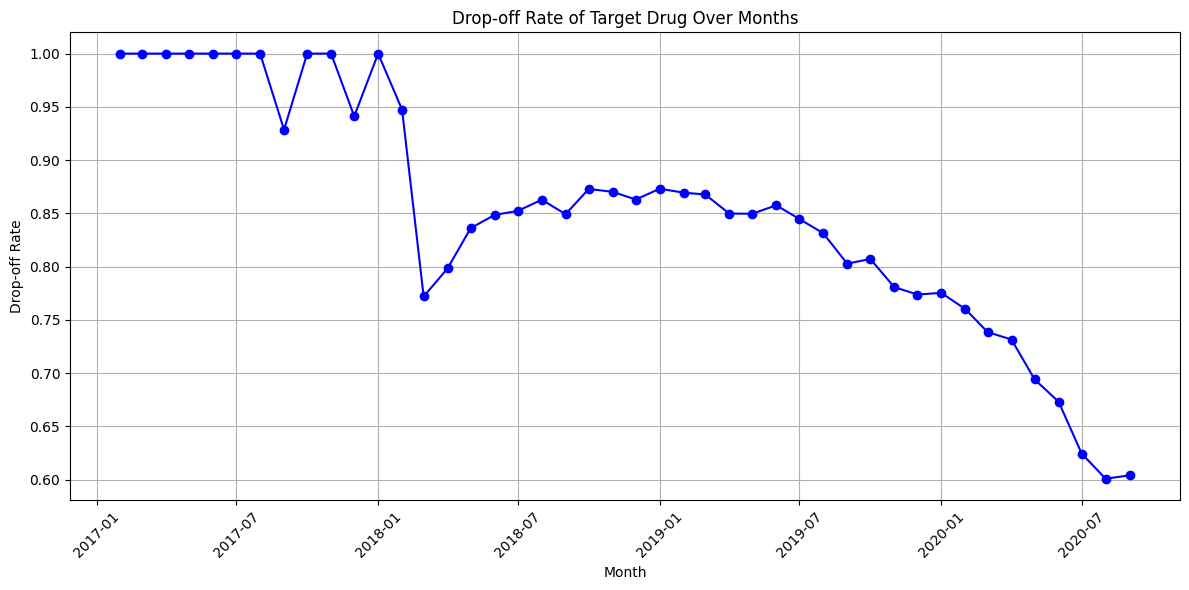

In [ ]:
import matplotlib.pyplot as plt

# Convert Period index to string representation
dropoff_rate_per_month.index = dropoff_rate_per_month.index.to_timestamp()

# Plot drop-off rate per month
plt.figure(figsize=(12, 6))
plt.plot(dropoff_rate_per_month.index, dropoff_rate_per_month.values, marker='o', color='blue')
plt.title('Drop-off Rate of Target Drug Over Months')
plt.xlabel('Month')
plt.ylabel('Drop-off Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Calculate drop_rate

In [ ]:
event_grouped = df_train.groupby('Incident')


In [ ]:
threshold_date = pd.to_datetime('2023-01-01')  # Adjust the threshold date as needed

total_patients = event_grouped['Patient-Uid'].nunique()
dropped_patients = event_grouped.apply(lambda group: (group['Date'] > threshold_date).all()).sum()


In [ ]:
dropoff_rate = (dropped_patients / total_patients) * 100
dropoff_rate

Incident
DRUG_TYPE_0          0.0
DRUG_TYPE_1          0.0
DRUG_TYPE_10         0.0
DRUG_TYPE_11         0.0
DRUG_TYPE_12         0.0
DRUG_TYPE_13         0.0
DRUG_TYPE_14         0.0
DRUG_TYPE_15         0.0
DRUG_TYPE_16         0.0
DRUG_TYPE_17         0.0
DRUG_TYPE_18         0.0
DRUG_TYPE_2          0.0
DRUG_TYPE_3          0.0
DRUG_TYPE_4          0.0
DRUG_TYPE_5          0.0
DRUG_TYPE_6          0.0
DRUG_TYPE_7          0.0
DRUG_TYPE_8          0.0
DRUG_TYPE_9          0.0
PRIMARY_DIAGNOSIS    0.0
SYMPTOM_TYPE_0       0.0
SYMPTOM_TYPE_1       0.0
SYMPTOM_TYPE_10      0.0
SYMPTOM_TYPE_11      0.0
SYMPTOM_TYPE_12      0.0
SYMPTOM_TYPE_13      0.0
SYMPTOM_TYPE_14      0.0
SYMPTOM_TYPE_15      0.0
SYMPTOM_TYPE_16      0.0
SYMPTOM_TYPE_17      0.0
SYMPTOM_TYPE_18      0.0
SYMPTOM_TYPE_19      0.0
SYMPTOM_TYPE_2       0.0
SYMPTOM_TYPE_20      0.0
SYMPTOM_TYPE_21      0.0
SYMPTOM_TYPE_22      0.0
SYMPTOM_TYPE_23      0.0
SYMPTOM_TYPE_24      0.0
SYMPTOM_TYPE_25      0.0
SYMPTOM_TYPE_26 